# Metrics
## Key Concepts

`Metrics` is a very wide term used in many different occassions to provide a measure for something. We usually use them for comparing and tracking purposes. Today, we will make a distinction between business metrics and error metrics, both are widely used in the data field.

concept   |  description
---          |---
`metric`       |     the variable that we are trying to understand and predict
`KPI`      |     Key Performance Indicator
`error metric`    |     the variables influencing the dependent variable
`MSE`    |     Mean Square Error
`RMSE`        |     Root Mean Square Error
`R2`        |    R squared metric
`residuals`    |   differenece between real and estimated value



## KPIs
Key Performance Indicators (KPIs) are metrics, but not all the metrics are KPIs. Because of the fact that we can't put the `=` sign between these two, it's important to understand what both of them represent.

KPIs are metrics that are used to measure business critical initiatives, goals and objectives. They are agreed on by the team (a metric that is a KPI in your company doesn't need to be a KPI in a different company). A KPI does not only clearly explain how to calculate it but also includes information about the planned target (so the team / company can check if they are where they want to be).

- Customer-focused KPIs generally center on per-customer efficiency, customer satisfaction, and customer retention.
- Process-focused KPIs aim to measure and monitor operational performance across the organization.
- Generally speaking, businesses measure and track KPIs through business analytics software and reporting tools.
- General types of KPIs: raw numbers (don't tell as much of a story), progress, change
- 4 attributes of KPIs
  - Measure: what are you measuring, be as specific as possible i.e. new customers vs new customers this quarter
  - Target: our goal -> apples to apples
  - Source: Where is the data coming from? i.e. Customer relationship management (**CRM**) is a process in  which a business or other organization administers its interactions with customers, typically using data analysis to study large amounts of  information
  - Frequency: How often are you reporting on this KPI?


Examples of metrics that could be KPIs:
- Growth in Revenue
- Net Promoter Score (NPS)
- Number of Qualified Leads (per period)
- Number of New Customers (per period)
- Customer Life Time Value (LTV)
- Average Support Resolution Time 

## Metrics used in research

Metrics is not a term that is only reserved for the business world. Metrics are widely used in forecasting/estimation models to provide the error of their performance (so we know which models are better). Building such models is primarly a responsibility of Data Scientists. However, there is no clear division between Data Science and Data Analytics (and also other data related roles) with respect to metrics. Data Analysts will work on such problems as well. One of the most common examples is probably the Linear Regression model, which is the topic of the next encounter.

Data Science deals with many different types of problems:

![image.png](attachment:image.png)

Depending on the problem we are working on there will be a different set of possible metrics we could use to evaluate the performance of our model (for example classification metrics will have different purpose from regression metrics). Also, while each metric is focusing on providing slightly different information, it’s important to understand what we want to optimize for so we could choose the most suitable error metric.

As our next step will be learning about Linear Regression (which is one of the most popular regression models), let’s explore some of the regression error metrics a bit more.

### import

In [1]:
import statsmodels.tools.eval_measures as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Penguins dataset

Calculate metrics describing penguins:
- average bill length for different species of the penguins
- range of the body mass in grams on different islands
- popularity of penguins species

Are there any assumptions that we need to take into account?

In [2]:
penguins = sns.load_dataset(name='penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# average bill length for different species of the penguins
penguins.groupby(by='species')['bill_length_mm'].mean()

species
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: bill_length_mm, dtype: float64

In [4]:
# range of the body mass in grams on different islands
penguins.groupby(by='island')['body_mass_g'].min()

island
Biscoe       2850.0
Dream        2700.0
Torgersen    2900.0
Name: body_mass_g, dtype: float64

In [5]:
penguins.groupby(by='island')['body_mass_g'].max()

island
Biscoe       6300.0
Dream        4800.0
Torgersen    4700.0
Name: body_mass_g, dtype: float64

In [6]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
# popularity of penguins species on diff islands
penguins.groupby(by='species')['island'].count() / len(penguins)

species
Adelie       0.441860
Chinstrap    0.197674
Gentoo       0.360465
Name: island, dtype: float64

### Math Jargon

$y$ - the actual value of the metric is question <br>
$\widehat{y}$ - also called y hat is in our case the estimation, forecast or prediction <br>
$\bar{y}$ - average of actual values

## Regression error metrics

Regression analysis is a process used to study sets of data in order to determine whether any relationship(s) exist. It can be thought of as a best guess at the trend that the data follows, and can be useful for making predictions about the data.

Regression error metrics will try to compare the estimations and real data points. The most popular are: MSE, RMSE, MAE, etc.


### MSE

One of the most common **loss functions** that can capture the **error** of the model is **MSE (Mean Squared Error)**:


$$ MSE = \frac{1}{N}\sum_{i=1}^{n}(\widehat{y}_i - y_i)^2 $$ 
 
Notice that in the MSE equation we square the difference (i.e. error) between the predicted and the actual value, since we only care about the magnitude of the error and not its sign. Some properties of MSE:
- we will penalize bigger differences between real and estimated values
- the bigger MSE is, the worse your model is performing
- MSE can't be represented by a negative number
- there is no upper range for MSE  
- you can only compare MSE for different models working on the same dataset
- the units of MSE are squared units


### RMSE
**RMSE (Root Mean Square Error)** is an extension of MSE:

$$ RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{n}(\widehat{y}_i - y_i)^2} $$ 

Properties of RMSE are very similar to MSE besides the units part - the units of RMSE are the same as the units of the value we are trying to estimate.

### R2

**Coefficient of Determination**, denoted by $ R^2 $ (R squared) can be defined as follows:

$$ R^2 = 1 - \frac{SSE}{SS_{total}} $$

where

$$ SSE = \sum_{i=1}^{n}(\widehat{y}_i - y_i)^2 $$ 

$$ SS_{total} = \sum_{i=1}^{n}(\bar{y}_i - y_i)^2  $$

One can interpret this equation as a comparison of the model to the average value of the response variable: The value of $ R^2 $ has a maximum value of one. If we get an $ R^2 $ of zero, that means that the model is no better than a simple average over all points. On the other hand, if the value of $ R^2 $ is equal to one, that means that model has a loss of zero, i.e. estimates the data points perfectly or a **perfect fit**!


## statsmodels

How can this be implemented using python? The two main packages for use cases are scikit-learn and statsmodels. Statsmodels is a Python package that provides functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at [statsmodels.org](statsmodels.org).

The package can be easily installed using pip:

```
pip install statsmodels
```


In [8]:
sales_dict_forecasts = {'month':['jan','feb','march','april','may','june'],
                         'sales':[25,34,49,50,66,74]}

In [9]:
df_forecasts = pd.DataFrame(sales_dict_forecasts)

In [10]:
df_forecasts

,month,sales
0,jan,25
1,feb,34
2,march,49
3,april,50
4,may,66
5,june,74


In [11]:
sales_dict_actual = {'month':['jan','feb','march','april','may','june'],
                         'sales':[35,44,50,60,55,80]}
df_actual = pd.DataFrame(sales_dict_actual)
df_actual

,month,sales
0,jan,35
1,feb,44
2,march,50
3,april,60
4,may,55
5,june,80


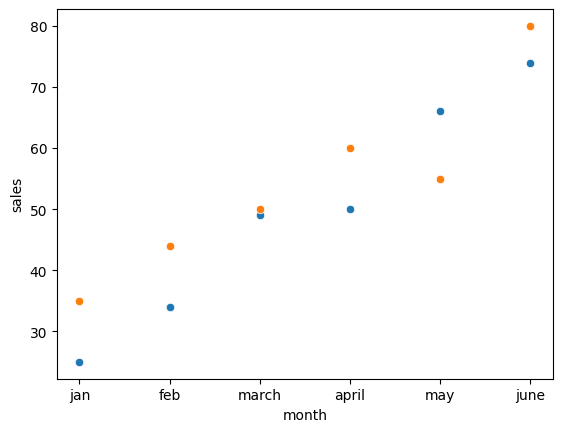

In [12]:
sns.scatterplot(x='month', y='sales', data=df_forecasts)
sns.scatterplot(x='month', y='sales', data=df_actual);

In [13]:
sm.mse(df_forecasts['sales'], df_actual['sales']) # hard to interpet 

76.33333333333333

In [14]:
sm.rmse(df_forecasts['sales'], df_actual['sales']) # uses the same units as the dataset

8.736894948054104